['y', 'b', 'g', 'r']


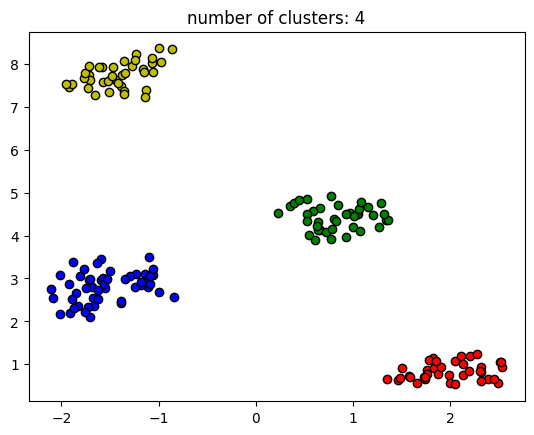

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.50, random_state=0)
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


[ 0  0  0  0 -1  0  0  2  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  2  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0 -1 -1  0  1  0 -1 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0
  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  2  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0
  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

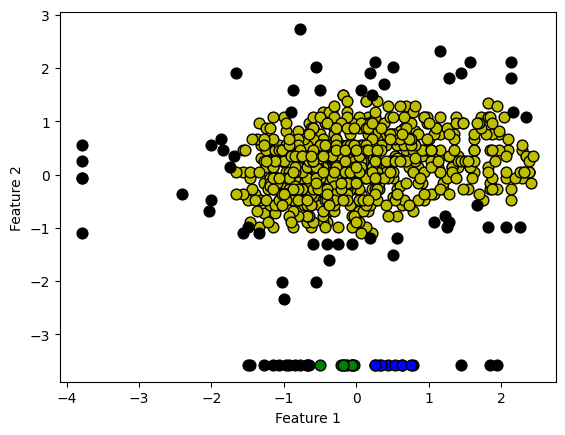

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data from CSV file
data = pd.read_csv("diabetes.csv")

# Extract feature values as numpy array
X = data.values[:,1:3]

# Normalize feature values
X = StandardScaler().fit_transform(X)

# Apply DBSCAN clustering
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)

# Extract cluster labels
labels = db.labels_
print(labels)

# Plotting the clusters
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, marker='o', edgecolor='k', s=60)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


[ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  1  0  0
  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

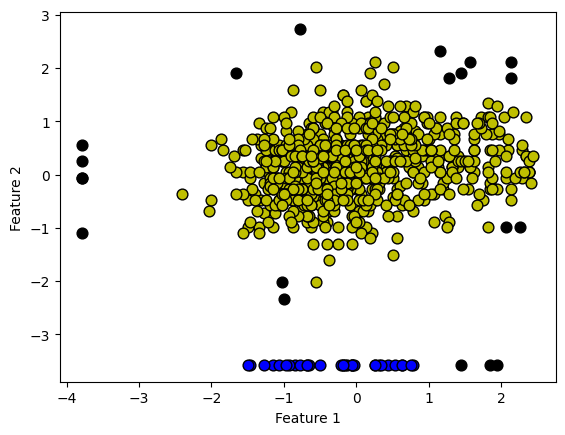

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data from CSV file
data = pd.read_csv("diabetes.csv")

# Extract feature values as numpy array
X = data.values[:,1:3]

# Normalize feature values

X = StandardScaler().fit_transform(X)


# Apply DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
db.fit(X)

# Extract cluster labels
labels = db.labels_
print(labels)
# Plotting the clusters
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
for k in unique_labels:
    if k == -1:
        # Black used for noise.
        col = 'k'
    else:
        col = colors[k % len(colors)]  # Cycle through colors for different clusters

    data = (labels == k)

    xy = X[data]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, marker='o', edgecolor='k', s=60)


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
